In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


# Pre-Processing: Data Cleaning & Feature Engineering

In [2]:
df = pd.read_csv("CarSellDataset.csv")

In [3]:
display(df.head(10))

,Brand,Model Name,Model Variant,Car Type,Transmission,Fuel Type,Year,Kilometers,Owner,State,Accidental,Price
0,Mahindra,TUV300,AX5,SUV,Manual,CNG,2017,164654,1st,Rajasthan,No,547253
1,Skoda,Rapid,Style,Sedan,Manual,Petrol,2018,41351,1st,Maharashtra,No,512050
2,Maruti Suzuki,Alto,Z,Hatchback,Manual,Diesel,2002,119090,3rd+,Tamil Nadu,No,678923
3,Hyundai,Grand i10,Magna,Hatchback,Manual,Diesel,2013,19979,1st,Andhra Pradesh,No,522500
4,Mahindra,XUV500,W8,SUV,Manual,Petrol,2011,130591,3rd+,Bihar,No,401182
5,Maruti Suzuki,Dzire,Base,Sedan,Manual,Diesel,2019,71192,1st,Uttar Pradesh,No,219848
6,MG,Hector,Smart,SUV,Manual,CNG,2023,61255,2nd,Maharashtra,No,1092070
7,Maruti Suzuki,Baleno,L,Hatchback,Manual,Diesel,2017,55072,1st,Gujarat,No,643104
8,Maruti Suzuki,Ignis,L,Hatchback,Manual,Electric,2022,130490,1st,Bihar,No,1128600
9,Maruti Suzuki,Swift,V,Sedan,Automatic,Petrol,2018,103459,1st,Gujarat,No,181046


In [4]:
#Shape of the dataset
display(df.shape)

(140904, 12)

In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140904 entries, 0 to 140903
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Brand          140904 non-null  object
 1   Model Name     140904 non-null  object
 2   Model Variant  140904 non-null  object
 3   Car Type       140904 non-null  object
 4   Transmission   140904 non-null  object
 5   Fuel Type      140904 non-null  object
 6   Year           140904 non-null  int64 
 7   Kilometers     140904 non-null  int64 
 8   Owner          140904 non-null  object
 9   State          140904 non-null  object
 10  Accidental     140904 non-null  object
 11  Price          140904 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 12.9+ MB


None

In [6]:
df.isna().sum() #No of Null values in each columns

,0
Brand,0
Model Name,0
Model Variant,0
Car Type,0
Transmission,0
Fuel Type,0
Year,0
Kilometers,0
Owner,0
State,0


In [7]:
print(df.nunique()) #No of Unique values in each column

Brand               18
Model Name          84
Model Variant       82
Car Type             5
Transmission         2
Fuel Type            5
Year                24
Kilometers       95860
Owner                3
State               27
Accidental           2
Price            17745
dtype: int64


In [8]:
df["Brand"].unique()    #Unique values in Brand column

array(['Mahindra', 'Skoda', 'Maruti Suzuki', 'Hyundai', 'MG', 'Audi',
       'Toyota', 'Honda', 'Tata', 'Ford', 'Chevrolet', 'BMW',
       'Volkswagen', 'Jaguar', 'Renault', 'Kia', 'Range Rover', 'Nissan'],
      dtype=object)

In [9]:
#unique values in each column
for col in df.columns:
    print(f"Distinct values in column '{col}':")
    display(df[col].unique())
    print("\n" + "="*50 + "\n") # Separator

Distinct values in column 'Brand':


array(['Mahindra', 'Skoda', 'Maruti Suzuki', 'Hyundai', 'MG', 'Audi',
       'Toyota', 'Honda', 'Tata', 'Ford', 'Chevrolet', 'BMW',
       'Volkswagen', 'Jaguar', 'Renault', 'Kia', 'Range Rover', 'Nissan'],
      dtype=object)



Distinct values in column 'Model Name':


array(['TUV300', 'Rapid', 'Alto', 'Grand i10', 'XUV500', 'Dzire',
       'Hector', 'Baleno', 'Ignis', 'Swift', 'Ertiga', 'A6',
       'Urban Cruiser', 'City', 'Verna', 'Celerio', 'Jazz', 'Brio',
       'Harrier', 'Venue', 'Aspire', 'Tavera', 'Innova', 'Altroz',
       'WagonR', 'Aura', 'Creta', 'Figo', '5 Series', 'Ameo', 'XE',
       'Nexon', 'Vento', 'Kwid', 'i20', 'WR-V', 'Tiago', 'Kiger',
       'EcoSport', 'Sonet', 'Tigor', 'S-Presso', 'Bolero', 'Endeavour',
       'Beat', 'Amaze', 'Taigun', 'Glanza', 'Seltos', 'Fortuner', 'Thar',
       'Polo', 'Q7', 'Superb', 'X3', 'Evoque', 'A4', 'Triber', 'i10',
       'Slavia', 'Etios', 'F-Pace', 'ZS EV', 'Scorpio', 'Cruze', 'Carens',
       'Terrano', 'Astor', 'Duster', 'Sunny', 'Kushaq', 'Octavia',
       'Micra', '3 Series', 'Velar', 'X1', 'Magnite', 'Discovery Sport',
       'XF', 'Sail', 'Q5', 'Q3', 'Spark', 'Sport'], dtype=object)



Distinct values in column 'Model Variant':


array(['AX5', 'Style', 'Z', 'Magna', 'W8', 'Base', 'Smart', 'L', 'V',
       'Technology', 'E', 'XZA+', 'Trend+', 'G', 'AX3', 'LTZ', 'VX', 'XT',
       'SX', 'Trend', 'Sport', 'ZX', 'XE', 'Trendline', 'Prestige', 'G+',
       'Asta', 'GT', 'RXE', 'Ambiente', 'S', 'Titanium+', 'XM', 'Era',
       'RXZ', 'GTX', 'Comfortline', 'W11', 'LS', 'RXL', 'AX7', 'W8(O)',
       'RXT', 'Savvy', 'Sharp', 'Highline+', 'HTK', 'Monte Carlo',
       'Sportz', 'Highline', 'Titanium', 'Portfolio', 'Premium', 'XZA',
       'M Sport', 'HSE', 'Premium Plus', 'W6', 'Ambition', 'Pure',
       'SX(O)', 'LT', 'XZ', 'Luxury Line', 'HTE', 'W10', 'XV Premium',
       'HTX+', 'Sports', 'W4', 'XV Premium (O)', 'Active', 'HTK+', 'GTX+',
       'HTX', 'L&K', 'XL', 'Autobiography', 'SE', 'XV', 'R-Dynamic',
       'Super'], dtype=object)



Distinct values in column 'Car Type':


array(['SUV', 'Sedan', 'Hatchback', 'MPV', 'Luxury'], dtype=object)



Distinct values in column 'Transmission':


array(['Manual', 'Automatic'], dtype=object)



Distinct values in column 'Fuel Type':


array(['CNG', 'Petrol', 'Diesel', 'Electric', 'Hybrid'], dtype=object)



Distinct values in column 'Year':


array([2017, 2018, 2002, 2013, 2011, 2019, 2023, 2022, 2021, 2015, 2020,
       2009, 2016, 2005, 2012, 2014, 2010, 2007, 2006, 2004, 2003, 2008,
       2001, 2000])



Distinct values in column 'Kilometers':


array([164654,  41351, 119090, ..., 126265,  35961,  88697])



Distinct values in column 'Owner':


array(['1st', '3rd+', '2nd'], dtype=object)



Distinct values in column 'State':


array(['Rajasthan', 'Maharashtra', 'Tamil Nadu', 'Andhra Pradesh',
       'Bihar', 'Uttar Pradesh', 'Gujarat', 'West Bengal', 'Kerala',
       'Madhya Pradesh', 'Haryana', 'Telangana', 'Delhi', 'Punjab',
       'North East', 'Karnataka', 'Jharkhand', 'Goa', 'Odisha',
       'Himachal Pradesh', 'Chhattisgarh', 'Uttarakhand', 'Puducherry',
       'Assam', 'Jammu & Kashmir', 'Chandigarh', 'Other UTs'],
      dtype=object)



Distinct values in column 'Accidental':


array(['No', 'Yes'], dtype=object)



Distinct values in column 'Price':


array([ 547253,  512050,  678923, ...,  493143,  192727, 1070129])

In [10]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()  #standardize missing values, removing space and adding underscore

df = df.drop_duplicates() #drop the duplicate enteries

df = df.dropna()

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140904 entries, 0 to 140903
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   brand          140904 non-null  object
 1   model_name     140904 non-null  object
 2   model_variant  140904 non-null  object
 3   car_type       140904 non-null  object
 4   transmission   140904 non-null  object
 5   fuel_type      140904 non-null  object
 6   year           140904 non-null  int64 
 7   kilometers     140904 non-null  int64 
 8   owner          140904 non-null  object
 9   state          140904 non-null  object
 10  accidental     140904 non-null  object
 11  price          140904 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 12.9+ MB


None

In [11]:
for col in ["price","kilometers"]:
  if col in df.columns:
    df[col] = df[col].astype(str).str.replace(',', '').str.replace('₹', '').astype(float)

print("\nCleaned dataset info:")
df.info()


Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140904 entries, 0 to 140903
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   brand          140904 non-null  object 
 1   model_name     140904 non-null  object 
 2   model_variant  140904 non-null  object 
 3   car_type       140904 non-null  object 
 4   transmission   140904 non-null  object 
 5   fuel_type      140904 non-null  object 
 6   year           140904 non-null  int64  
 7   kilometers     140904 non-null  float64
 8   owner          140904 non-null  object 
 9   state          140904 non-null  object 
 10  accidental     140904 non-null  object 
 11  price          140904 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 12.9+ MB


In [12]:
df.head()

,brand,model_name,model_variant,car_type,transmission,fuel_type,year,kilometers,owner,state,accidental,price
0,Mahindra,TUV300,AX5,SUV,Manual,CNG,2017,164654.0,1st,Rajasthan,No,547253.0
1,Skoda,Rapid,Style,Sedan,Manual,Petrol,2018,41351.0,1st,Maharashtra,No,512050.0
2,Maruti Suzuki,Alto,Z,Hatchback,Manual,Diesel,2002,119090.0,3rd+,Tamil Nadu,No,678923.0
3,Hyundai,Grand i10,Magna,Hatchback,Manual,Diesel,2013,19979.0,1st,Andhra Pradesh,No,522500.0
4,Mahindra,XUV500,W8,SUV,Manual,Petrol,2011,130591.0,3rd+,Bihar,No,401182.0


In [13]:
df.describe()

,year,kilometers,price
count,140904.000000,140904.000000,1.409040e+05
mean,2016.960391,95024.595987,7.617872e+05
std,5.106106,49133.157878,4.438578e+05
min,2000.000000,10000.000000,5.005500e+04
25%,2014.000000,52421.000000,4.116420e+05
50%,2018.000000,94973.500000,6.828030e+05
75%,2021.000000,137618.000000,1.034178e+06
max,2023.000000,179998.000000,2.744280e+06


In [14]:
display(df['brand'].value_counts()) #each brand counts

,count
brand,
Maruti Suzuki,54030
Hyundai,22090
Honda,11936
Toyota,10483
Mahindra,9618
Tata,8825
Ford,5217
Volkswagen,3716
Renault,3024


In [15]:
import datetime

current_year = datetime.datetime.now().year
df['car_age'] = current_year - df['year']

df['price_per_km'] = df['price'] / df['kilometers']
df['price_per_km'].replace([float('inf'), -float('inf')], 0, inplace=True)

/tmp/ipython-input-693759571.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price_per_km'].replace([float('inf'), -float('inf')], 0, inplace=True)


In [16]:
df.head()

,brand,model_name,model_variant,car_type,transmission,fuel_type,year,kilometers,owner,state,accidental,price,car_age,price_per_km
0,Mahindra,TUV300,AX5,SUV,Manual,CNG,2017,164654.0,1st,Rajasthan,No,547253.0,8,3.323654
1,Skoda,Rapid,Style,Sedan,Manual,Petrol,2018,41351.0,1st,Maharashtra,No,512050.0,7,12.383014
2,Maruti Suzuki,Alto,Z,Hatchback,Manual,Diesel,2002,119090.0,3rd+,Tamil Nadu,No,678923.0,23,5.700924
3,Hyundai,Grand i10,Magna,Hatchback,Manual,Diesel,2013,19979.0,1st,Andhra Pradesh,No,522500.0,12,26.152460
4,Mahindra,XUV500,W8,SUV,Manual,Petrol,2011,130591.0,3rd+,Bihar,No,401182.0,14,3.072049


# EDA

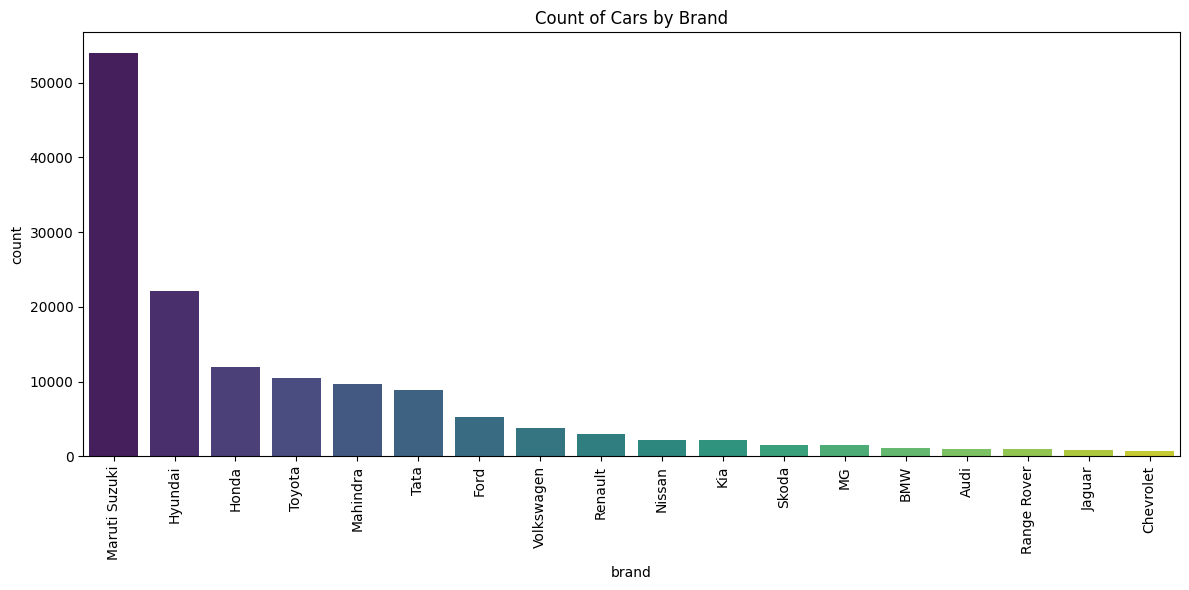

In [17]:
# Get the counts of each brand
brand_counts = df['brand'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values, hue=brand_counts.index, palette='viridis', legend=False)
plt.xticks(rotation=90)
plt.xlabel('brand')
plt.ylabel('count')
plt.title('Count of Cars by Brand')
plt.tight_layout()
plt.show()

In [18]:
# Count occurrences of each car type
car_type_counts = df['car_type'].value_counts()
display(car_type_counts)

,count
car_type,
Hatchback,55890
Sedan,36897
SUV,35057
MPV,9702
Luxury,3358


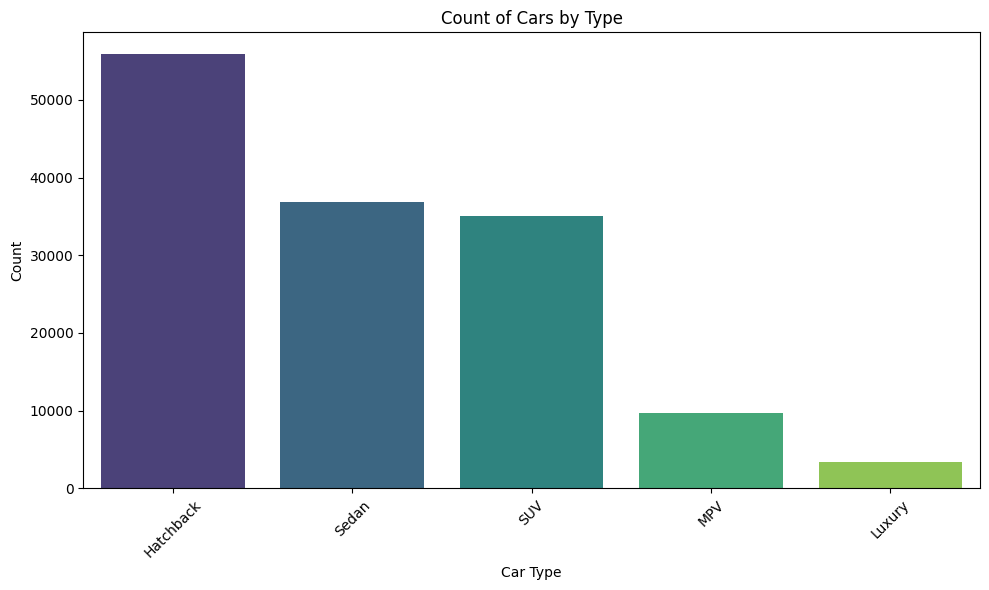

In [19]:
# Create a bar plot for car type counts
plt.figure(figsize=(10, 6))
sns.barplot(x=car_type_counts.index, y=car_type_counts.values, hue=car_type_counts.index, palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.xlabel('Car Type')
plt.ylabel('Count')
plt.title('Count of Cars by Type')
plt.tight_layout()
plt.show()

In [20]:
brand_dict = df.groupby('car_type')['brand'].unique().to_dict()

brand_counts = df.groupby(['car_type', 'brand']).size().reset_index(name='count')
print(brand_counts)

     car_type          brand  count
0   Hatchback      Chevrolet    292
1   Hatchback          Honda   2368
2   Hatchback        Hyundai   9557
3   Hatchback  Maruti Suzuki  35832
4   Hatchback         Nissan    552
5   Hatchback        Renault    799
6   Hatchback           Tata   3450
7   Hatchback         Toyota   2096
8   Hatchback     Volkswagen    944
9      Luxury           Audi    634
10     Luxury            BMW   1052
11     Luxury         Jaguar    290
12     Luxury             MG    476
13     Luxury    Range Rover    906
14        MPV      Chevrolet    154
15        MPV            Kia    684
16        MPV  Maruti Suzuki   6037
17        MPV        Renault    766
18        MPV         Toyota   2061
19        SUV           Ford   2605
20        SUV          Honda   2390
21        SUV        Hyundai   6303
22        SUV            Kia   1462
23        SUV             MG   1016
24        SUV       Mahindra   9618
25        SUV         Nissan   1089
26        SUV        Renault

<Figure size 1500x800 with 0 Axes>

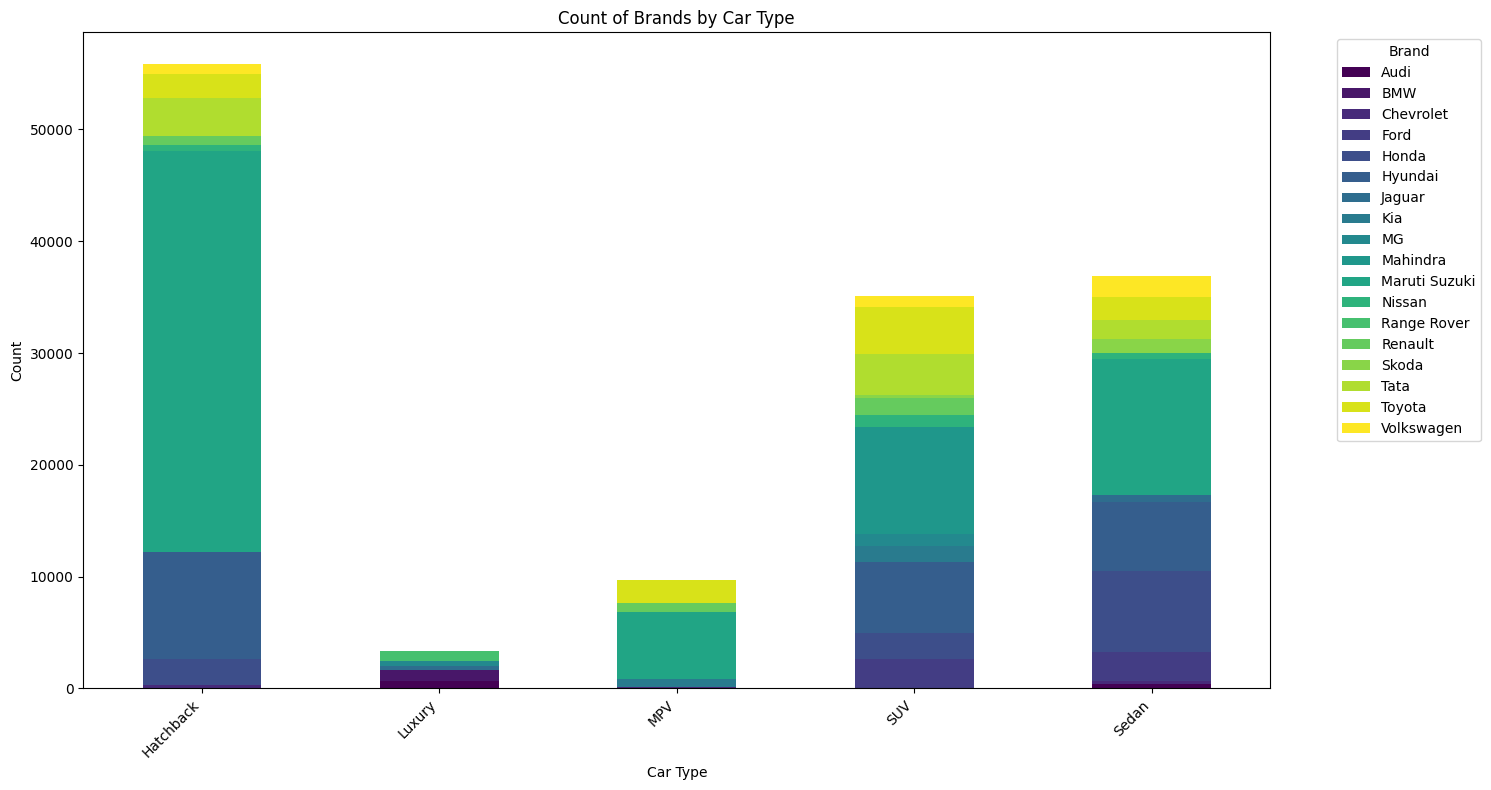

In [21]:
brand_car_type_pivot = brand_counts.pivot(index='car_type', columns='brand', values='count').fillna(0)

# Plotting the stacked bar chart
plt.figure(figsize=(15, 8))
brand_car_type_pivot.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')
plt.title('Count of Brands by Car Type')
plt.xlabel('Car Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2487499614.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_price_by_km_bin = df_sorted.groupby('kilometers_bins')['price'].mean().reset_index()


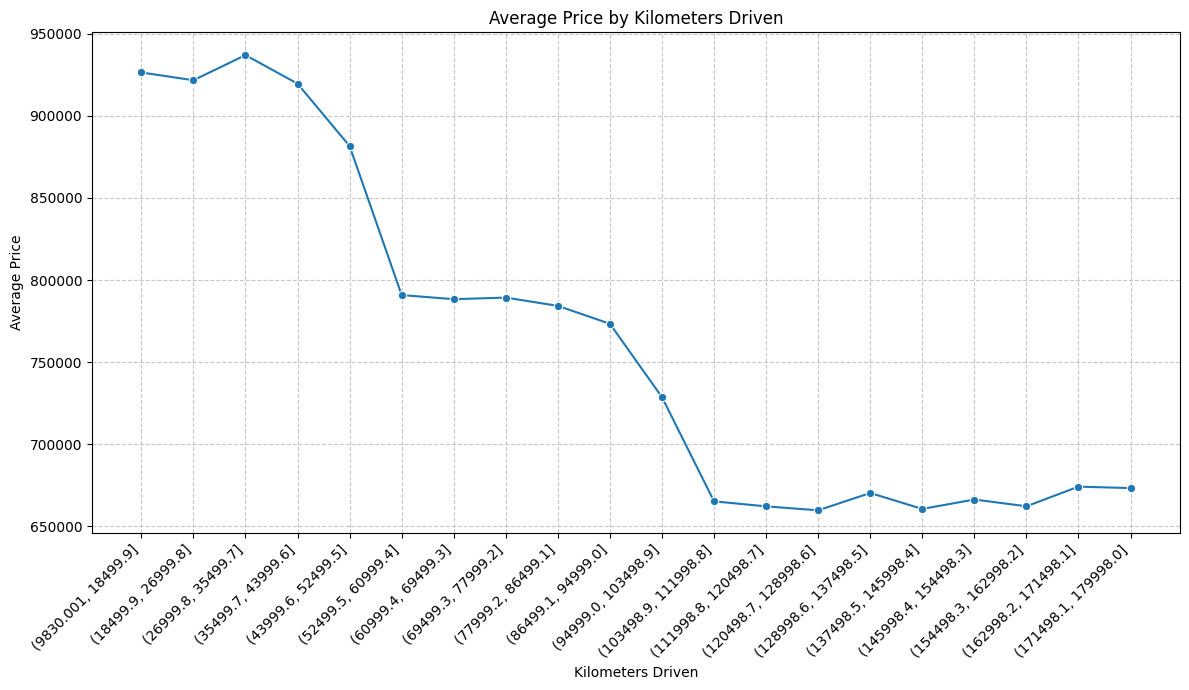

In [22]:
df_sorted = df.sort_values('kilometers')
df_sorted['kilometers_bins'] = pd.cut(df_sorted['kilometers'], bins=20, include_lowest=True)

average_price_by_km_bin = df_sorted.groupby('kilometers_bins')['price'].mean().reset_index()

# Convert bins to string for plotting if necessary, or use the bin midpoints
# For simplicity, we can use the string representation of the bins

plt.figure(figsize=(12, 7))
sns.lineplot(x=average_price_by_km_bin['kilometers_bins'].astype(str), y='price', data=average_price_by_km_bin, marker='o')
plt.title('Average Price by Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-469810744.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='owner', y='price', data=average_price_by_owner, palette='inferno')


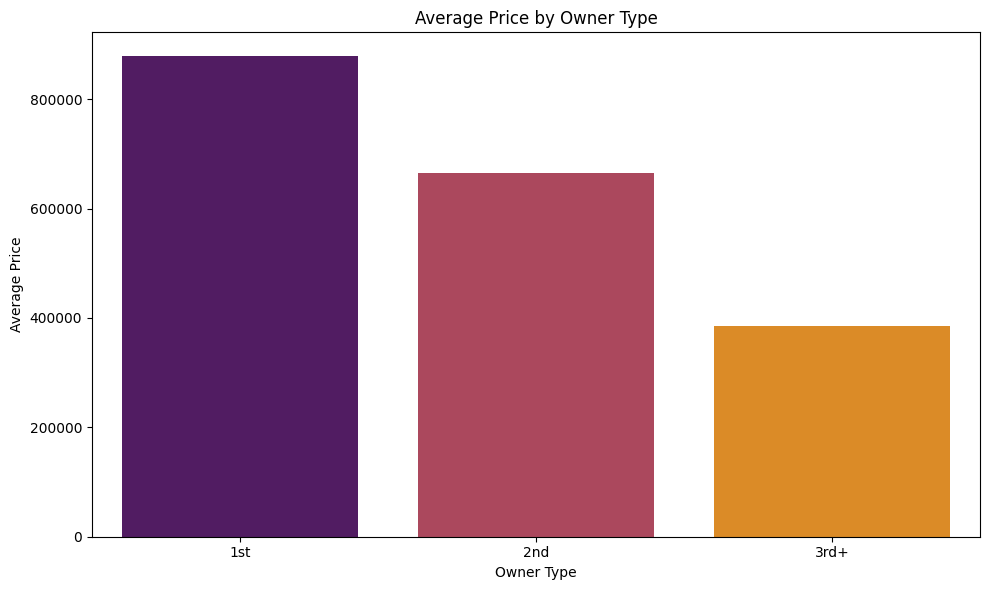

In [23]:
average_price_by_owner = df.groupby('owner')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='owner', y='price', data=average_price_by_owner, palette='inferno')
plt.title('Average Price by Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

/tmp/ipython-input-856275531.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='price', data=average_price_by_state, palette='crest')


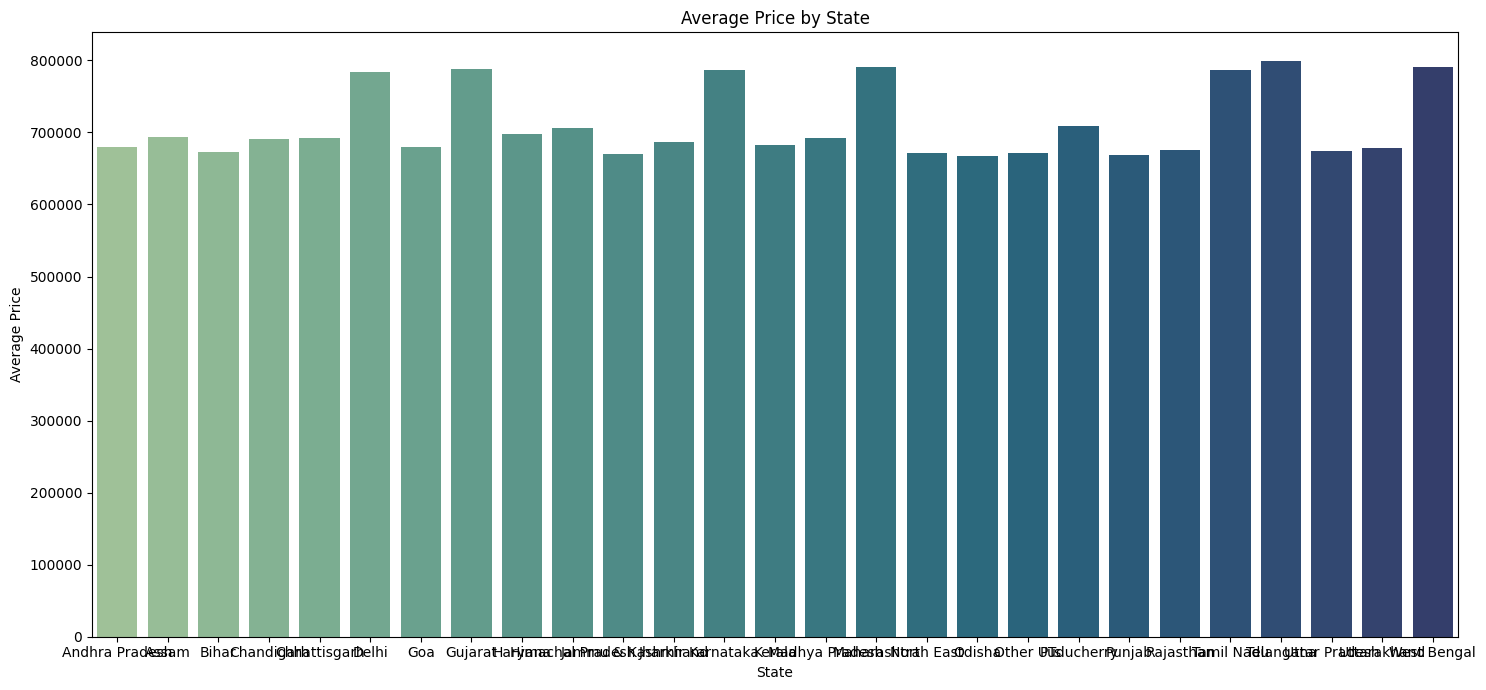

In [24]:
average_price_by_state = df.groupby('state')['price'].mean().reset_index()

plt.figure(figsize=(15, 7))
sns.barplot(x='state', y='price', data=average_price_by_state, palette='crest')
plt.title('Average Price by State')
plt.xlabel('State')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

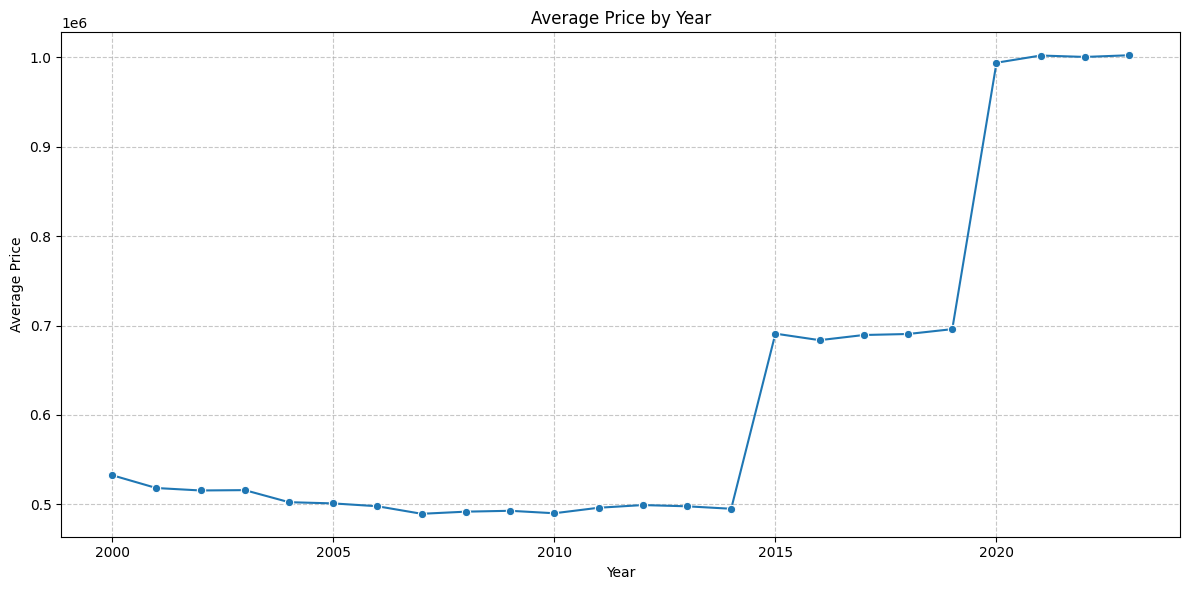

In [25]:
average_price_by_year = df.groupby('year')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='price', data=average_price_by_year, marker='o')
plt.title('Average Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

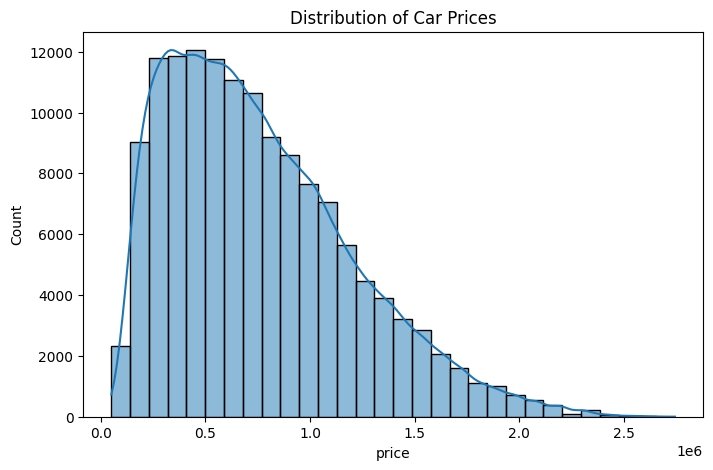

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Distribution of Car Prices")
plt.show()

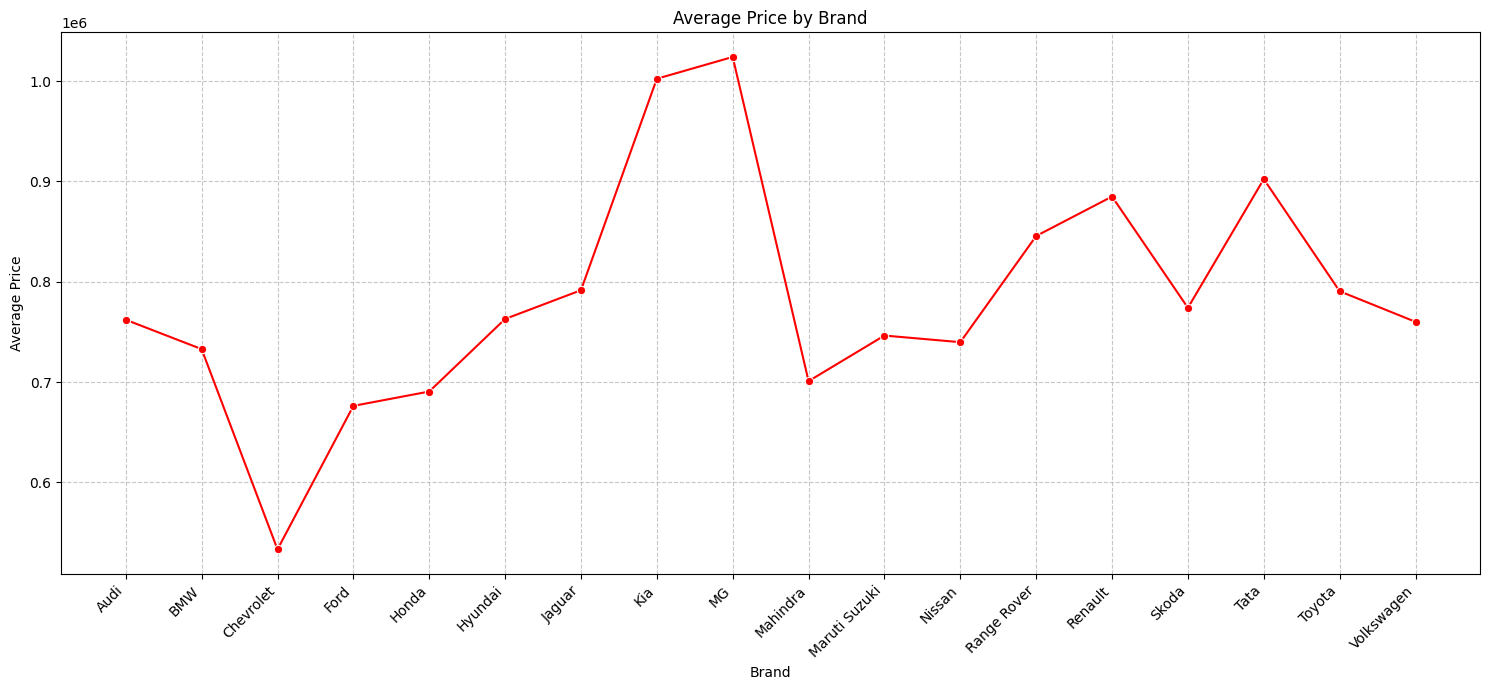

In [27]:
average_price_by_brand = df.groupby('brand')['price'].mean().reset_index()

plt.figure(figsize=(15, 7))
sns.lineplot(x='brand', y='price', data=average_price_by_brand, marker='o', color='red')
plt.title('Average Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

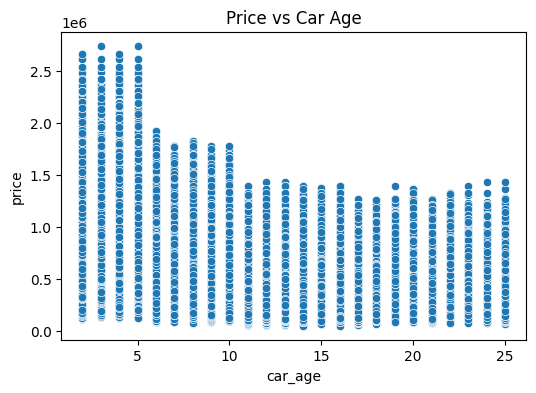

In [28]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='car_age', y='price', data=df)
plt.title("Price vs Car Age")
plt.show()

/tmp/ipython-input-770511894.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fuel_type', y='price', palette='viridis', data=df)


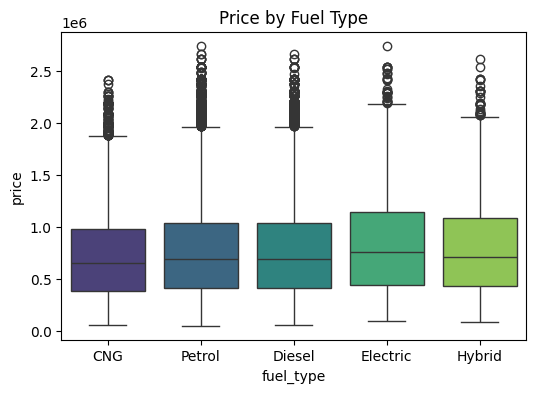

In [29]:
plt.figure(figsize=(6,4))
sns.boxplot(x='fuel_type', y='price', palette='viridis', data=df)
plt.title("Price by Fuel Type")
plt.show()

In [30]:
# Calculate IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Add outlier column: 1 if outlier, 0 otherwise
df['Price_Outlier'] = ((df['price'] < Q1 - 1.5*IQR) | (df['price'] > Q3 + 1.5*IQR)).astype(int)

# View the first few rows
outliers_only = df[df['Price_Outlier'] == 1]
print(outliers_only)


                brand model_name model_variant   car_type transmission  \
36                BMW   5 Series         Sport     Luxury       Manual   
38      Maruti Suzuki     Baleno            ZX  Hatchback       Manual   
47            Hyundai      Creta          Asta        SUV    Automatic   
182     Maruti Suzuki     Baleno             Z  Hatchback       Manual   
231     Maruti Suzuki    Celerio             Z  Hatchback    Automatic   
...               ...        ...           ...        ...          ...   
140384  Maruti Suzuki     Baleno             L  Hatchback    Automatic   
140414        Renault      Kiger           RXT        SUV       Manual   
140450  Maruti Suzuki      Ignis            ZX  Hatchback       Manual   
140708  Maruti Suzuki    Celerio            ZX  Hatchback       Manual   
140729        Renault      Kiger           RXT        SUV    Automatic   

       fuel_type  year  kilometers owner           state accidental  \
36        Petrol  2020     31389.0   1st

In [31]:
# Count of outliers
outlier_count = df['Price_Outlier'].sum()
print(f"Total Price outliers: {outlier_count}")

# List the Price values of outliers
outlier_prices = df.loc[df['Price_Outlier'] == 1, 'price']
print("Prices of outliers:")
print(outlier_prices)

Total Price outliers: 1820
Prices of outliers:
36        2299000.0
38        2019600.0
47        2096325.0
182       2194500.0
231       2032800.0
            ...    
140384    1974720.0
140414    2194500.0
140450    2052000.0
140708    2138400.0
140729    2159850.0
Name: price, Length: 1820, dtype: float64


In [32]:
# Remove Price outliers
df_clean = df[df['Price_Outlier'] == 0].copy()

# Reset index (optional)
df_clean.reset_index(drop=True, inplace=True)

# Check the cleaned dataframe
print(df_clean.head())
print(f"Original rows: {len(df)}, After removing outliers: {len(df_clean)}")
df = df_clean

           brand model_name model_variant   car_type transmission fuel_type  \
0       Mahindra     TUV300           AX5        SUV       Manual       CNG   
1          Skoda      Rapid         Style      Sedan       Manual    Petrol   
2  Maruti Suzuki       Alto             Z  Hatchback       Manual    Diesel   
3        Hyundai  Grand i10         Magna  Hatchback       Manual    Diesel   
4       Mahindra     XUV500            W8        SUV       Manual    Petrol   

   year  kilometers owner           state accidental     price  car_age  \
0  2017    164654.0   1st       Rajasthan         No  547253.0        8   
1  2018     41351.0   1st     Maharashtra         No  512050.0        7   
2  2002    119090.0  3rd+      Tamil Nadu         No  678923.0       23   
3  2013     19979.0   1st  Andhra Pradesh         No  522500.0       12   
4  2011    130591.0  3rd+           Bihar         No  401182.0       14   

   price_per_km  Price_Outlier  
0      3.323654              0  
1     12

/tmp/ipython-input-4073498231.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='car_type', y='price', data=df, palette='viridis')


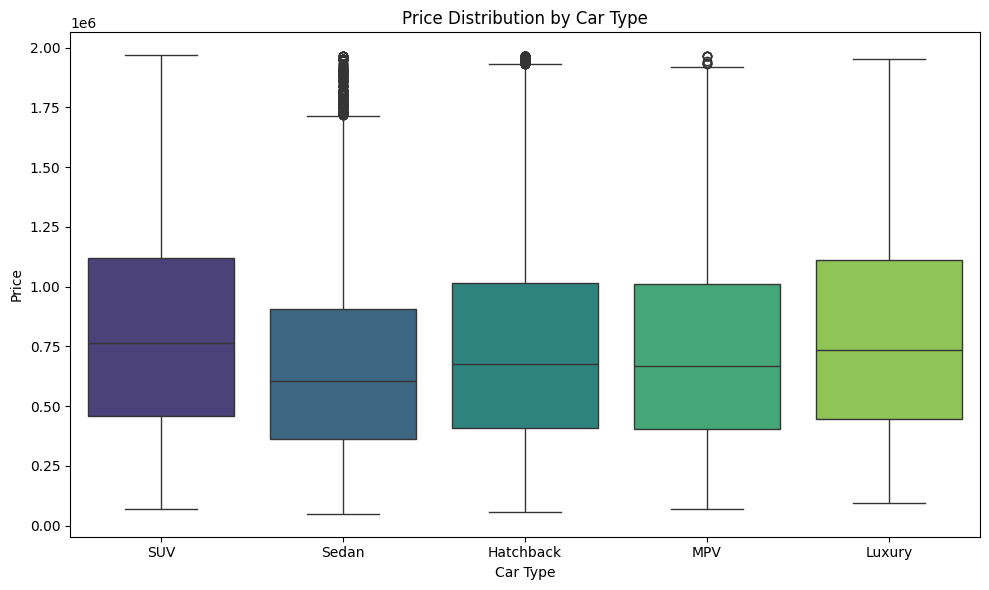

In [33]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='car_type', y='price', data=df, palette='viridis')
plt.title('Price Distribution by Car Type')
plt.xlabel('Car Type')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

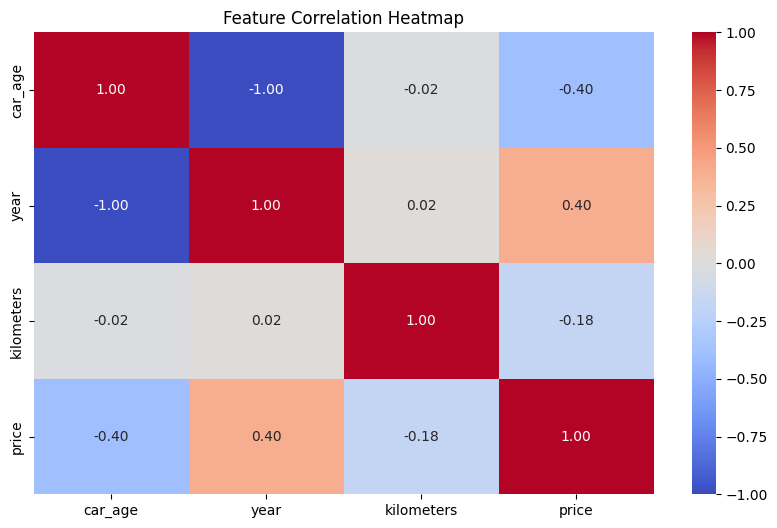

In [34]:
cols = ['car_age', 'year', 'kilometers', 'owner',
        'accidental', 'transmission', 'fuel_type', 'price']

df_corr = df[cols].corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [35]:
df.head()

,brand,model_name,model_variant,car_type,transmission,fuel_type,year,kilometers,owner,state,accidental,price,car_age,price_per_km,Price_Outlier
0,Mahindra,TUV300,AX5,SUV,Manual,CNG,2017,164654.0,1st,Rajasthan,No,547253.0,8,3.323654,0
1,Skoda,Rapid,Style,Sedan,Manual,Petrol,2018,41351.0,1st,Maharashtra,No,512050.0,7,12.383014,0
2,Maruti Suzuki,Alto,Z,Hatchback,Manual,Diesel,2002,119090.0,3rd+,Tamil Nadu,No,678923.0,23,5.700924,0
3,Hyundai,Grand i10,Magna,Hatchback,Manual,Diesel,2013,19979.0,1st,Andhra Pradesh,No,522500.0,12,26.152460,0
4,Mahindra,XUV500,W8,SUV,Manual,Petrol,2011,130591.0,3rd+,Bihar,No,401182.0,14,3.072049,0


In [36]:
df = df.drop("Price_Outlier", axis=1)
df.head()

,brand,model_name,model_variant,car_type,transmission,fuel_type,year,kilometers,owner,state,accidental,price,car_age,price_per_km
0,Mahindra,TUV300,AX5,SUV,Manual,CNG,2017,164654.0,1st,Rajasthan,No,547253.0,8,3.323654
1,Skoda,Rapid,Style,Sedan,Manual,Petrol,2018,41351.0,1st,Maharashtra,No,512050.0,7,12.383014
2,Maruti Suzuki,Alto,Z,Hatchback,Manual,Diesel,2002,119090.0,3rd+,Tamil Nadu,No,678923.0,23,5.700924
3,Hyundai,Grand i10,Magna,Hatchback,Manual,Diesel,2013,19979.0,1st,Andhra Pradesh,No,522500.0,12,26.152460
4,Mahindra,XUV500,W8,SUV,Manual,Petrol,2011,130591.0,3rd+,Bihar,No,401182.0,14,3.072049


# Modeling & Evaluation

In [37]:
targets = 'price'
feature = [col for col in df.columns if col != targets]

b = df[feature]
c = df[targets]

cat_features_price_per_km = b.select_dtypes(include=['object']).columns
num_features_price_per_km = b.select_dtypes(exclude=['object']).columns

print("Categorical features:", cat_features_price_per_km.tolist())
print("Numerical features:", num_features_price_per_km.tolist())

Categorical features: ['brand', 'model_name', 'model_variant', 'car_type', 'transmission', 'fuel_type', 'owner', 'state', 'accidental']
Numerical features: ['year', 'kilometers', 'car_age', 'price_per_km']


In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

# preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a ColumnTransformer to apply different transformations to different columns
preprocessor_price_per_km = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_features_price_per_km),
        ('cat', categorical_transformer, cat_features_price_per_km)
    ])

# You can transform your data using the preprocessor:
Z_processed = preprocessor_price_per_km.fit_transform(b)

print("Shape of the processed data:", Z_processed.shape)

Shape of the processed data: (139084, 232)


**Split Data**

In [39]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
Z_train, Z_test, c_train, c_test = train_test_split(Z_processed, c, test_size=0.2, random_state=42)

print("Shape of Z_train:", Z_train.shape)
print("Shape of Z_test:", Z_test.shape)
print("Shape of c_train:", c_train.shape)
print("Shape of c_test:", c_test.shape)

Shape of Z_train: (111267, 232)
Shape of Z_test: (27817, 232)
Shape of c_train: (111267,)
Shape of c_test: (27817,)


RandomForestRegressor Model

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Initialize and train the Random Forest Regressor
rf_model_price_per_km = RandomForestRegressor(
    n_estimators=300,
    max_depth=6,
    min_samples_split=2,
    random_state=42
)

rf_model_price_per_km.fit(Z_train, c_train)

# Make predictions on the test set
rf_pred_price_per_km = rf_model_price_per_km.predict(Z_test)

# Evaluate the Random Forest model
r2_rf = r2_score(c_test, rf_pred_price_per_km)
mae_rf = mean_absolute_error(c_test, rf_pred_price_per_km)
rmse_rf = np.sqrt(mean_squared_error(c_test, rf_pred_price_per_km))

print("Random Forest Regressor Evaluation:")
print(f"R² Score: {r2_rf:.3f}")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")

Random Forest Regressor Evaluation:
R² Score: 0.903
MAE: 84832.09
RMSE: 129171.25


XGBoost Model

In [41]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Initialize and train the XGBoost Regressor
# Using some common parameters, these can be tuned later
xgb_model_price_per_km = XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05, max_depth=5, random_state=42)
xgb_model_price_per_km.fit(Z_train, c_train)

# Make predictions on the test set
xgb_pred_price_per_km = xgb_model_price_per_km.predict(Z_test)

# Evaluate the XGBoost model
r2_xgb = r2_score(c_test, xgb_pred_price_per_km)
mae_xgb = mean_absolute_error(c_test, xgb_pred_price_per_km)
rmse_xgb = np.sqrt(mean_squared_error(c_test, xgb_pred_price_per_km))

print("XGBoost Regressor Evaluation:")
print(f"R² Score: {r2_xgb:.3f}")
print(f"MAE: {mae_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")

XGBoost Regressor Evaluation:
R² Score: 0.999
MAE: 8442.74
RMSE: 15951.75


> Observation:
**price_per_km** column is causing the model to predict it is easily by mulitplying it with km, to get the unknown *price* values. So deleting the `price_per_km` column.

In [42]:
df = df.drop("price_per_km", axis=1)
df.head()

,brand,model_name,model_variant,car_type,transmission,fuel_type,year,kilometers,owner,state,accidental,price,car_age
0,Mahindra,TUV300,AX5,SUV,Manual,CNG,2017,164654.0,1st,Rajasthan,No,547253.0,8
1,Skoda,Rapid,Style,Sedan,Manual,Petrol,2018,41351.0,1st,Maharashtra,No,512050.0,7
2,Maruti Suzuki,Alto,Z,Hatchback,Manual,Diesel,2002,119090.0,3rd+,Tamil Nadu,No,678923.0,23
3,Hyundai,Grand i10,Magna,Hatchback,Manual,Diesel,2013,19979.0,1st,Andhra Pradesh,No,522500.0,12
4,Mahindra,XUV500,W8,SUV,Manual,Petrol,2011,130591.0,3rd+,Bihar,No,401182.0,14


> Adding a new column **car_points** as per the below logic.

| **Feature**                   | **Condition / Range**                               | **Points** | **Impact Direction** | **Explanation**                                               |
| ----------------------------- | --------------------------------------------------- | ---------- | -------------------- | ------------------------------------------------------------- |
|**kilometers**                | < 10,000 km                                         | +9         | Positive             | Very low mileage — almost new.                                |
|                               | 10,000–30,000 km                                    | +8         | Positive             | Lightly used; excellent condition.                            |
|                               | 30,000–70,000 km                                    | +6         | Neutral–Positive     | Normal usage for mid-age cars.                                |
|                               | 70,000–100,000 km                                   | +3         | Slightly Negative    | Moderate wear and tear.                                       |
|                               | > 100,000 km                                        | -5         | Negative             | High mileage; price generally drops.                          |
| **car_age**                   | ≤ 2 years                                           | +10        | Positive             | Almost new — minimal depreciation.                            |
|                               | 3–5 years                                           | +8         | Positive             | Good value retention — newer model.                           |
|                               | 6–8 years                                           | +5         | Neutral              | Moderate depreciation expected.                               |
|                               | 9–12 years                                          | +2         | Slightly Negative    | Older; may need maintenance.                                  |
|                               | > 12 years                                          | -4         | Negative             | Significant depreciation.                                     |
| **year (Manufacturing Year)** | Current or Last Year                                | +9         | Positive             | Latest models fetch higher prices.                            |
|                               | 2–5 years old                                       | +7         | Positive             | Recent models still in demand.                                |
|                               | >5 years old                                        | +4         | Neutral              | Older models depreciate faster.                               |
| **model_variant**             | Top / Sports / Limited Edition                      | +10        | Positive             | Premium variant commands higher price.                        |
|                               | Mid Variant                                         | +6         | Positive             | Balanced features and price.                                  |
|                               | Base Variant                                        | +3         | Neutral              | Lower resale value.                                           |
| **model_name**                | Popular & Reliable (e.g., Swift, Corolla)           | +8         | Positive             | High demand improves resale.                                  |
|                               | Moderate Demand                                     | +5         | Neutral              | Average resale potential.                                     |
|                               | Low Demand / Discontinued                           | +2         | Negative             | Low market interest.                                          |
| **state**                     | Metro / High-demand city (Delhi, Mumbai, Bangalore) | +6         | Positive             | Urban demand increases price.                                 |
|                               | Tier-2 / Tier-3 city                                | +3         | Neutral              | Average market activity.                                      |
|                               | Rural / Low-demand region                           | -2         | Negative             | Lower demand affects pricing.                                 |
| **brand**                     | Luxury (BMW, Mercedes, Audi)                        | +10        | Positive             | Strong brand equity and demand.                               |
|                               | Premium (Toyota, Honda, Hyundai)                    | +7         | Positive             | Reliable and trusted.                                         |
|                               | Budget (Tata, Maruti, Renault)                      | +4         | Neutral              | Price-sensitive segment.                                      |
| **car_type**                  | Luxury                                              | +10        | Positive             | Premium comfort and features.                                 |
|                               | SUV                                                 | +8         | Positive             | Popular, high resale value.                                   |
|                               | Sedan                                               | +6         | Positive             | Balanced market demand.                                       |
|                               | MPV                                                 | +5         | Neutral              | Moderate resale depending on usage.                           |
|                               | Hatchback                                           | +4         | Neutral              | Budget-friendly, lower price range.                           |
| **owner**                     | 1st Owner                                           | +8         | Positive             | Best resale value.                                            |
|                               | 2nd Owner                                           | +5         | Neutral              | Acceptable resale if condition is good.                       |
|                               | 3rd or more Owners                                  | +2         | Negative             | Lower trust and resale value.                                 |
| **transmission**              | Automatic                                           | +6         | Positive             | Preferred in urban markets.                                   |
|                               | Manual                                              | +3         | Neutral              | Common and reliable, but cheaper resale.                      |
| **fuel_type**                 | Electric                                            | +8         | Positive             | High initial price, eco-friendly.                             |
|                               | Diesel                                              | +6         | Positive             | Good mileage, higher demand in some regions.                  |
|                               | Petrol                                              | +5         | Neutral              | Standard choice, balanced pricing.                            |
|                               | CNG / LPG                                           | +3         | Slightly Negative    | Economical but lower resale demand.                           |


In [43]:
# Function to calculate points for 'kilometers'
def calculate_kilometers_points(km):
    if km < 10000:
        return 9
    elif 10000 <= km <= 30000:
        return 8
    elif 30000 < km <= 70000:
        return 6
    elif 70000 < km <= 100000:
        return 3
    else:  # km > 100,000 km
        return -5

# Function to calculate points for 'car_age'
def calculate_car_age_points(age):
    if age <= 2:
        return 10
    elif 3 <= age <= 5:
        return 8
    elif 6 <= age <= 8:
        return 5
    elif 9 <= age <= 12:
        return 2
    else:  # age > 12 years
        return -4

# Function to calculate points for 'year' (Manufacturing Year)
import datetime
current_year = datetime.datetime.now().year # Already calculated as 2025 in notebook state

def calculate_year_points(year_val):
    if year_val == current_year:
        return 9
    elif current_year - 4 <= year_val <= current_year - 1: # 2-5 years old: current_year-1 to current_year-4
        return 7
    else: # >5 years old: year < current_year - 4
        return 4

# Function to calculate points for 'brand'
def calculate_brand_points(brand):
    luxury_brands = ['BMW', 'Audi', 'Jaguar', 'Range Rover']
    premium_brands = ['Toyota', 'Honda', 'Hyundai', 'Skoda', 'Volkswagen', 'Ford', 'Nissan', 'Kia', 'MG']
    budget_brands = ['Tata', 'Maruti Suzuki', 'Renault', 'Chevrolet', 'Mahindra']

    if brand in luxury_brands:
        return 10
    elif brand in premium_brands:
        return 7
    elif brand in budget_brands:
        return 4
    else:
        return 0 # Default if brand not found in lists

# Function to calculate points for 'car_type'
def calculate_car_type_points(car_type):
    if car_type == 'Luxury':
        return 10
    elif car_type == 'SUV':
        return 8
    elif car_type == 'Sedan':
        return 6
    elif car_type == 'MPV':
        return 5
    elif car_type == 'Hatchback':
        return 4
    else:
        return 0 # Default

# Function to calculate points for 'owner'
def calculate_owner_points(owner):
    if owner == '1st':
        return 8
    elif owner == '2nd':
        return 5
    elif owner == '3rd+': # Covers 3rd+ and 4th+ (assuming 4th+ is part of 3rd+ category)
        return 2
    else:
        return 0 # Default

# Function to calculate points for 'transmission'
def calculate_transmission_points(transmission):
    if transmission == 'Automatic':
        return 6
    elif transmission == 'Manual':
        return 3
    else:
        return 0 # Default

# Function to calculate points for 'fuel_type'
def calculate_fuel_type_points(fuel_type):
    if fuel_type == 'Electric':
        return 8
    elif fuel_type == 'Diesel':
        return 6
    elif fuel_type == 'Petrol':
        return 5
    elif fuel_type in ['CNG', 'LPG']: # Assuming 'CNG / LPG' means either
        return 3
    else:
        return 0 # Default

# Function to calculate points for 'state'
def calculate_state_points(state):
    metro_states = ['Delhi', 'Maharashtra', 'Karnataka', 'Tamil Nadu', 'Telangana', 'Gujarat', 'West Bengal']
    if state in metro_states:
        return 6
    else:
        return 3 # Default to Tier-2/Tier-3 for simplicity

# Initialize 'car_points' column with zeros
df['car_points'] = 0

# Apply point calculation functions and sum them up
df['car_points'] += df['kilometers'].apply(calculate_kilometers_points)
df['car_points'] += df['car_age'].apply(calculate_car_age_points)
df['car_points'] += df['year'].apply(calculate_year_points)
df['car_points'] += df['brand'].apply(calculate_brand_points)
df['car_points'] += df['car_type'].apply(calculate_car_type_points)
df['car_points'] += df['owner'].apply(calculate_owner_points)
df['car_points'] += df['transmission'].apply(calculate_transmission_points)
df['car_points'] += df['fuel_type'].apply(calculate_fuel_type_points)
df['car_points'] += df['state'].apply(calculate_state_points)

print("New 'car_points' column added to the DataFrame.")
display(df[['brand', 'model_name', 'kilometers', 'car_age', 'year', 'car_type', 'owner', 'transmission', 'fuel_type', 'state', 'car_points']].head())

New 'car_points' column added to the DataFrame.


,brand,model_name,kilometers,car_age,year,car_type,owner,transmission,fuel_type,state,car_points
0,Mahindra,TUV300,164654.0,8,2017,SUV,1st,Manual,CNG,Rajasthan,33
1,Skoda,Rapid,41351.0,7,2018,Sedan,1st,Manual,Petrol,Maharashtra,50
2,Maruti Suzuki,Alto,119090.0,23,2002,Hatchback,3rd+,Manual,Diesel,Tamil Nadu,20
3,Hyundai,Grand i10,19979.0,12,2013,Hatchback,1st,Manual,Diesel,Andhra Pradesh,45
4,Mahindra,XUV500,130591.0,14,2011,SUV,3rd+,Manual,Petrol,Bihar,20


In [44]:
# Save DataFrame to CSV
df.to_csv("CleanedCarDataset.csv", index=False)


In [45]:
target = 'price'
features = [col for col in df.columns if col != target]

X = df[features]
y = df[target]

cat_features = X.select_dtypes(include=['object']).columns
num_features = X.select_dtypes(exclude=['object']).columns

print("Categorical features:", cat_features.tolist())
print("Numerical features:", num_features.tolist())

Categorical features: ['brand', 'model_name', 'model_variant', 'car_type', 'transmission', 'fuel_type', 'owner', 'state', 'accidental']
Numerical features: ['year', 'kilometers', 'car_age', 'car_points']


In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a ColumnTransformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ])

# You can transform your data using the preprocessor:
X_processed = preprocessor.fit_transform(X)

print("Shape of the processed data:", X_processed.shape)

Shape of the processed data: (139084, 232)


**Split Data**

In [47]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (111267, 232)
Shape of X_test: (27817, 232)
Shape of y_train: (111267,)
Shape of y_test: (27817,)


### RandomForest Model

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=6,
    min_samples_split=2,
    random_state=42
)

rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
r2_rf = r2_score(y_test, rf_pred)
mae_rf = mean_absolute_error(y_test, rf_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_pred))

print("Random Forest Regressor Evaluation:")
print(f"R² Score: {r2_rf:.3f}")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")

Random Forest Regressor Evaluation:
R² Score: 0.286
MAE: 289497.57
RMSE: 350470.40


### XGBoost Model

In [49]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Initialize and train the XGBoost Regressor
# Using some common parameters, these can be tuned later
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_pred = xgb_model.predict(X_test)

# Evaluate the XGBoost model
r2_xgb = r2_score(y_test, xgb_pred)
mae_xgb = mean_absolute_error(y_test, xgb_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_test, xgb_pred))

print("XGBoost Regressor Evaluation:")
print(f"R² Score: {r2_xgb:.3f}")
print(f"MAE: {mae_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")

XGBoost Regressor Evaluation:
R² Score: 0.293
MAE: 288154.93
RMSE: 348752.49


#LGBM Model

In [50]:
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Initialize and train the LightGBM Regressor
# Using some common parameters, these can be tuned later
lgbm_model = lgb.LGBMRegressor(objective='regression', n_estimators=1000, learning_rate=0.05, num_leaves=31, random_state=42, n_jobs=-1)
lgbm_model.fit(X_train, y_train)

# Make predictions on the test set
lgbm_pred = lgbm_model.predict(X_test)

# Evaluate the LightGBM model
r2_lgbm = r2_score(y_test, lgbm_pred)
mae_lgbm = mean_absolute_error(y_test, lgbm_pred)
rmse_lgbm = np.sqrt(mean_squared_error(y_test, lgbm_pred))

print("LightGBM Regressor Evaluation:")
print(f"R² Score: {r2_lgbm:.3f}")
print(f"MAE: {mae_lgbm:.2f}")
print(f"RMSE: {rmse_lgbm:.2f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 820
[LightGBM] [Info] Number of data points in the train set: 111267, number of used features: 232
[LightGBM] [Info] Start training from score 744356.655423


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


LightGBM Regressor Evaluation:
R² Score: 0.292
MAE: 288464.15
RMSE: 349108.87


In [51]:
# # Plot Actual vs. Predicted Prices for LightGBM
# plt.figure(figsize=(8, 6))
# plt.scatter(y_test, lgbm_pred, alpha=0.3)
# plt.xlabel("Actual Prices")
# plt.ylabel("Predicted Prices")
# plt.title("Actual vs. Predicted Prices (LightGBM)")
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add a diagonal line for reference
# plt.show()

In [52]:
# # Plot Residuals Distribution for LightGBM
# residuals_lgbm = y_test - lgbm_pred

# plt.figure(figsize=(8, 6))
# sns.histplot(residuals_lgbm, bins=50, kde=True)
# plt.xlabel("Residuals (Actual - Predicted)")
# plt.ylabel("Frequency")
# plt.title("Distribution of Residuals (LightGBM)")
# plt.show()

In [53]:
# # Display actual and predicted values in a DataFrame for LightGBM
# import pandas as pd

# results_lgbm_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price (LGBM)': lgbm_pred})

# display(results_lgbm_df.head())

### AdaBoost

In [54]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor


# AdaBoost with DecisionTree as base estimator
ada_model = AdaBoostRegressor(
        estimator=DecisionTreeRegressor(max_depth=6),
        n_estimators=200,
        learning_rate=0.1,
        random_state=42
    )

ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)

print("\n===== ADA BOOST PERFORMANCE ====")
print("R²:", round(r2_score(y_test, ada_pred),3))
print("MAE:", round(mean_absolute_error(y_test, ada_pred),2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, ada_pred)),2))


===== ADA BOOST PERFORMANCE ====
R²: 0.29
MAE: 288897.92
RMSE: 349401.42


### Linear Regession Model

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_pred = lr_model.predict(X_test)

# Evaluate the Linear Regression model
r2_lr = r2_score(y_test, lr_pred)
mae_lr = mean_absolute_error(y_test, lr_pred)
rmse_lr = np.sqrt(mean_squared_error(y_test, lr_pred))

print("Linear Regression Model Evaluation:")
print(f"R² Score: {r2_lr:.3f}")
print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")

Linear Regression Model Evaluation:
R² Score: 0.267
MAE: 292440.43
RMSE: 355010.49


# Decission Tree

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_pred = dt_model.predict(X_test)

# Evaluate the Decision Tree model
r2_dt = r2_score(y_test, dt_pred)
mae_dt = mean_absolute_error(y_test, dt_pred)
rmse_dt = np.sqrt(mean_squared_error(y_test, dt_pred))

print("Decision Tree Regressor Evaluation:")
print(f"R² Score: {r2_dt:.3f}")
print(f"MAE: {mae_dt:.2f}")
print(f"RMSE: {rmse_dt:.2f}")

Decision Tree Regressor Evaluation:
R² Score: -0.435
MAE: 389166.60
RMSE: 496791.12


### Weighted Ensemble Training

In [67]:
#taking the r2 scores from the above models
model_r2_scores = {
    "RandomForest": r2_rf,
    "XGBoost": r2_xgb,
    "LightGBM": r2_lgbm,
    "AdaBoost": 0.29,
    "LinearRegression": r2_lr,
    "DecisionTree": r2_dt
}

# Calculate the sum of all R-squared scores
sum_r2_scores = sum(model_r2_scores.values())

# Calculate weights for each model
weight_rf = model_r2_scores["RandomForest"] / sum_r2_scores
weight_xgb = model_r2_scores["XGBoost"] / sum_r2_scores
weight_lgbm = model_r2_scores["LightGBM"] / sum_r2_scores
weight_ada = model_r2_scores["AdaBoost"] / sum_r2_scores
weight_lr = model_r2_scores["LinearRegression"] / sum_r2_scores
weight_dt = model_r2_scores["DecisionTree"] / sum_r2_scores

print("Model R-squared Scores:", model_r2_scores)
print("Sum of R-squared Scores:", sum_r2_scores)
print("Calculated Weights:")
print(f"  RandomForest Weight: {weight_rf:.3f}")
print(f"  XGBoost Weight: {weight_xgb:.3f}")
print(f"  LightGBM Weight: {weight_lgbm:.3f}")
print(f"  AdaBoost Weight: {weight_ada:.3f}")
print(f"  Linear Regression Weight: {weight_lr:.3f}")
print(f"  DecisionTree Weight: {weight_dt:.3f}")

Model R-squared Scores: {'RandomForest': 0.28603783670777694, 'XGBoost': 0.2930199503468641, 'LightGBM': 0.2915743557158974, 'AdaBoost': 0.29, 'LinearRegression': 0.26742028329475187, 'DecisionTree': -0.4345647619652657}
Sum of R-squared Scores: 0.9934876641000245
Calculated Weights:
  RandomForest Weight: 0.288
  XGBoost Weight: 0.295
  LightGBM Weight: 0.293
  AdaBoost Weight: 0.292
  Linear Regression Weight: 0.269
  DecisionTree Weight: -0.437


In [68]:
ensemble_predictions = (
    weight_rf * rf_pred +
    weight_xgb * xgb_pred +
    weight_lgbm * lgbm_pred +
    weight_ada * ada_pred +
    weight_lr * lr_pred +
    weight_dt * dt_pred
)

print("Ensemble predictions calculated.")

Ensemble predictions calculated.


In [69]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2_ensemble = r2_score(y_test, ensemble_predictions)
mae_ensemble = mean_absolute_error(y_test, ensemble_predictions)
rmse_ensemble = np.sqrt(mean_squared_error(y_test, ensemble_predictions))

print("Weighted Ensemble Model Evaluation:")
print(f"R² Score: {r2_ensemble:.3f}")
print(f"MAE: {mae_ensemble:.2f}")
print(f"RMSE: {rmse_ensemble:.2f}")

Weighted Ensemble Model Evaluation:
R² Score: 0.153
MAE: 308612.96
RMSE: 381806.96


**Creating different model_performance df**

In [70]:
model_performance = pd.DataFrame({
    'Model': ['RandomForest', 'XGBoost', 'LightGBM', 'AdaBoost', 'Linear Regression', 'DecisionTree', 'Weighted Ensemble'],
    'R2 Score': [r2_rf, r2_xgb, r2_lgbm, 0.29, r2_lr, r2_dt, r2_ensemble],
    'MAE': [mae_rf, mae_xgb, mae_lgbm, 288897.92, mae_lr, mae_dt, mae_ensemble],
    'RMSE': [rmse_rf, rmse_xgb, rmse_lgbm, 349401.42, rmse_lr, rmse_dt, rmse_ensemble]
})

model_performance.set_index('Model', inplace=True)
display(model_performance.round(3))

,R2 Score,MAE,RMSE
Model,,,
RandomForest,0.286,289497.575,350470.397
XGBoost,0.293,288154.934,348752.493
LightGBM,0.292,288464.150,349108.866
AdaBoost,0.290,288897.920,349401.420
Linear Regression,0.267,292440.433,355010.491
DecisionTree,-0.435,389166.599,496791.116
Weighted Ensemble,0.153,308612.964,381806.962


In [79]:
model_performance.to_csv('model_performance.csv', index=True)
print("Model performance data saved to 'model_performance.csv'")

Model performance data saved to 'model_performance.csv'


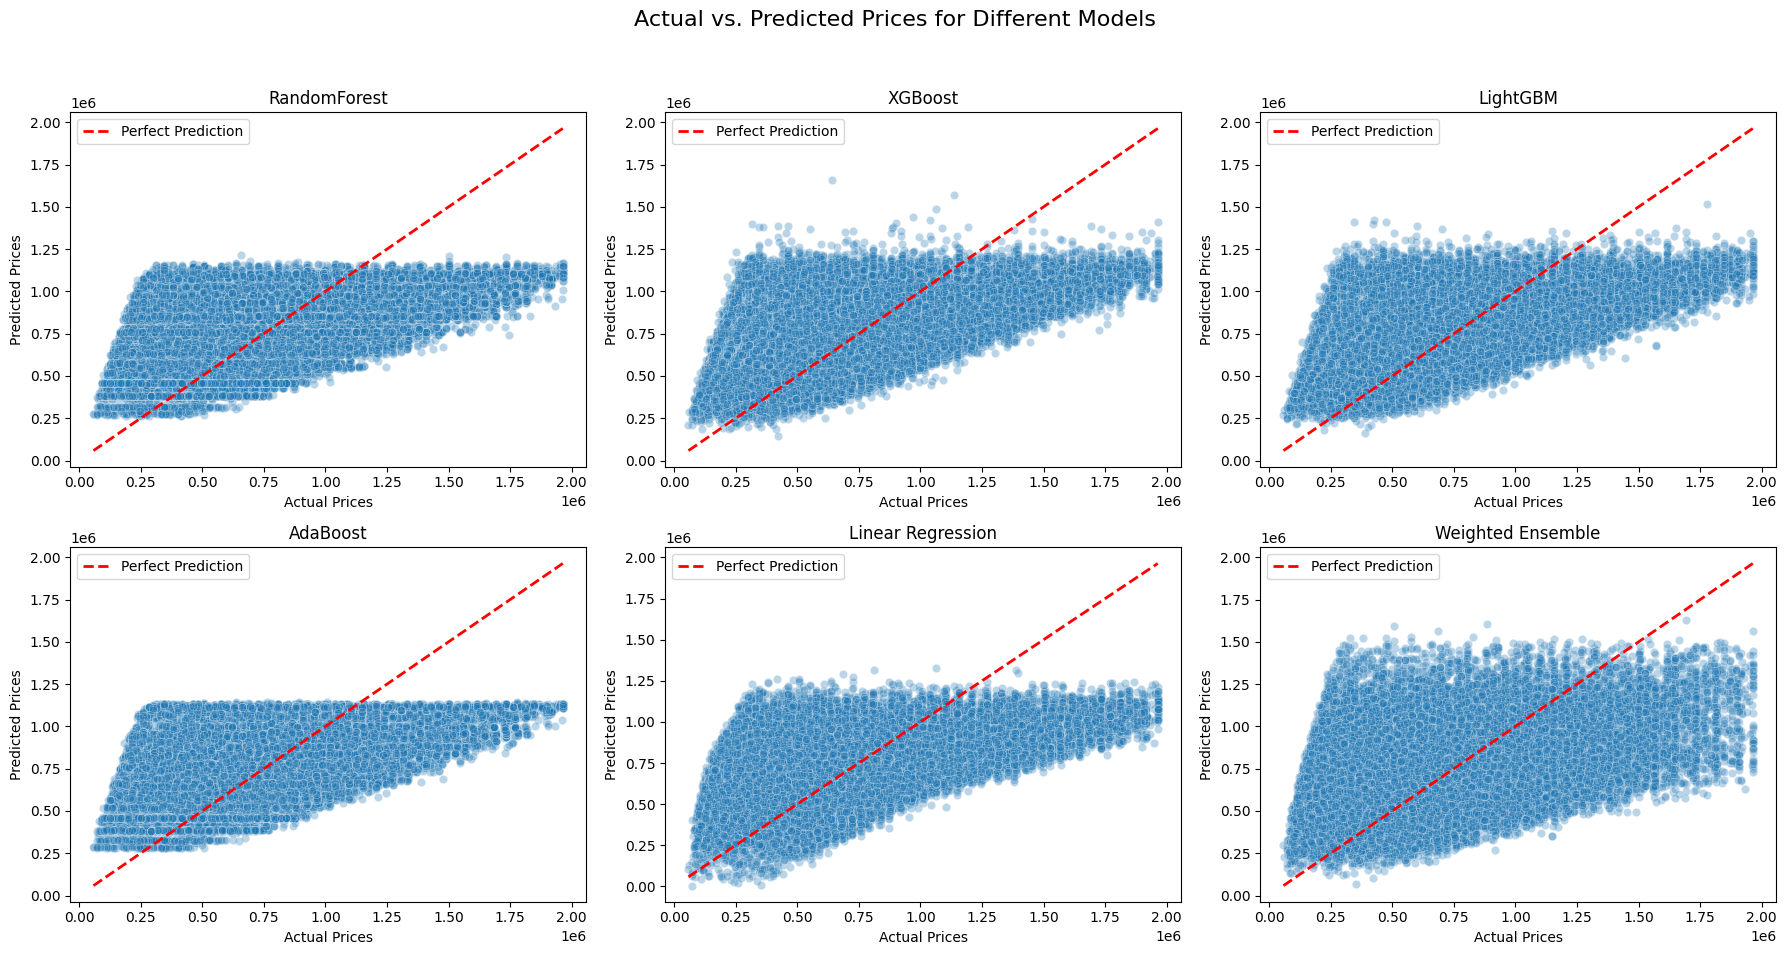

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# model predictions
model_preds = {
    'RandomForest': rf_pred,
    'XGBoost': xgb_pred,
    'LightGBM': lgbm_pred,
    'AdaBoost': ada_pred,
    'Linear Regression': lr_pred,
    'Weighted Ensemble': ensemble_predictions
}

# number of subplots
num_models = len(model_preds)
num_cols = 3 
num_rows = (num_models + num_cols - 1) // num_cols 

plt.figure(figsize=(num_cols * 6, num_rows * 5))
plt.suptitle('Actual vs. Predicted Prices for Different Models')

i = 1
for model_name, predictions in model_preds.items():
    plt.subplot(num_rows, num_cols, i)
    sns.scatterplot(x=y_test, y=predictions, alpha=0.3, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'{model_name}')
    plt.legend()
    i += 1

plt.tight_layout()
plt.show()

### Saving the Models for Streamlit Dashboard

In [71]:
import joblib
import pickle

# Save models
joblib.dump(lr_model, "linearRegression_model.joblib")
joblib.dump(rf_model, "randomForest_model.joblib")
joblib.dump(xgb_model, "xgboost_model.joblib")
joblib.dump(ada_model, "ada_model.joblib")
joblib.dump(lgbm_model, "lgbm_model.joblib")
joblib.dump(dt_model, "dt_model.joblib")


# Save preprocessor
joblib.dump(preprocessor, "preprocessor.joblib")

# Save feature info (pickle is fine)
import pickle
feature_info = {
    "categorical": cat_features.tolist(),
    "numerical": num_features.tolist()
}
with open("feature_info.pkl", "wb") as f:
    pickle.dump(feature_info, f)